In [1]:
#import library
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default') 
import matplotlib.font_manager as font_manager
import os
import plotly.express as px

#install font support thai
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=10)

In [2]:
#Load and check dataset from csv file
df_project = pd.read_csv('opendata_project.csv')
df_unittype = pd.read_csv('opendata_unittype.csv')
print(df_project,df_unittype)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


       row_number                project_id  \
0         20630.0               project_355   
1          5779.0             project_10921   
2         14782.0              project_2803   
3          2958.0  61cd47850f4ed900132da7d7   
4           558.0             project_12680   
...           ...                       ...   
23739      8493.0  5ea93e5b68253d0012adc22f   
23740        32.0             project_16907   
23741      1646.0              project_4907   
23742      3478.0  5e903f589f161600121b5150   
23743     17278.0             project_12757   

                                   name_en                          name_th  \
0                         Baan Pimarn Kaew                    บ้านพิมานแก้ว   
1                           Chonya Ville 4                      ชลญาวิลล์ 4   
2                      Atoll Waikiki Shore                เอโทล ไวกีกิ ชอร์   
3                Supalai Bliss Baannameang         ศุภาลัย บลิซ บ้านนาเมือง   
4      Laddarom Ratchaphruek-Rattanathib

In [3]:
df_project = df_project.loc[ : , ['project_id','name_en','name_th','propertytype_name_en','propertytype_name_th','price_min','latitude','longitude','province_id','province_name_en','province_name_th'] ]
n_df_project = df_project[df_project.province_id.isin([3781,3372,3599])][df_project['project_id'].str.contains("project")]

df_unittype = df_unittype.loc[ : , ['unittype_id','project_id','propertytype_id','propertytype_name_en','propertytype_name_th','area_usable_min','price_min'] ]
n_df_unittype = df_unittype[df_unittype.propertytype_id.isin([1,2,3,4,6,20000])]


df_inner = pd.merge(n_df_project,n_df_unittype,how='inner',on='project_id')
df_inner.loc[ : , ['project_id','name_en','name_th','propertytype_id','propertytype_name_en_x','propertytype_name_th_x','price_min_y','latitude','longitude','province_id','province_name_en','province_name_th'] ]

print(n_df_project,n_df_unittype,df_inner)


          project_id                                            name_en  \
2       project_2803                                Atoll Waikiki Shore   
4      project_12680                Laddarom Ratchaphruek-Rattanathibet   
5       project_2636                                 Charoenkrung Place   
6       project_4325                             Ideo Mix Phahon Yothin   
14     project_13916                         Metris Pattanakarn-Ekkamai   
...              ...                                                ...   
23734  project_16990  Baan Klang Muang the Edition Rama 9 – Krungthe...   
23735   project_8710                   Baan Pruksa Prime Ramintra-Kubon   
23736   project_5255                            Baan Butsabakam Village   
23737   project_8165                                Siamese Thirty nine   
23741   project_4907                    Baan Klang Krung Siam-Pathumwan   

                                               name_th propertytype_name_en  \
2                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


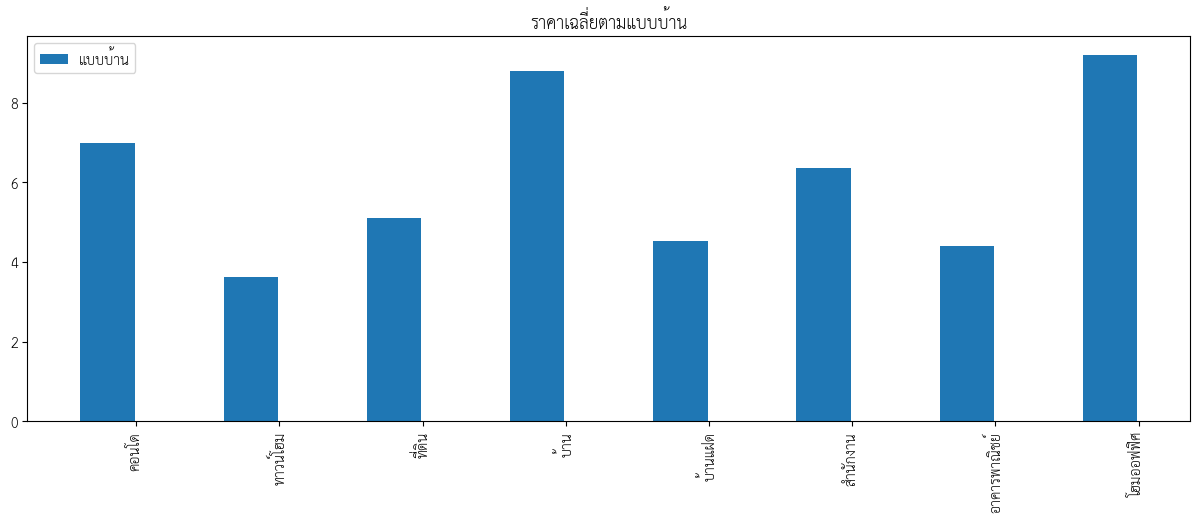

In [4]:
df_groupby = df_inner.groupby(['propertytype_name_th_x','province_name_th'])[['price_min_y']].agg('mean')
df_groupby

#df_groupby = df_inner.groupby(['propertytype_name_th_x'])[['price_min_y']].agg('mean')

t1 = (df_inner.groupby(['propertytype_name_th_x'])['price_min_y'].mean())
t1_name = list(t1.keys())
t1_value  = t1.values/1000000

X_axis = np.arange(len(t1_name))

plt.figure(figsize=(15,5),dpi=100) 
#ploat
plt.title('ราคาเฉลี่ยตามแบบบ้าน')
plt.bar(X_axis - 0.2, t1_value, 0.38, label = 'แบบบ้าน')

plt.xticks(rotation = 'vertical')
plt.xticks(X_axis, t1_name)

plt.legend()
plt.show() 

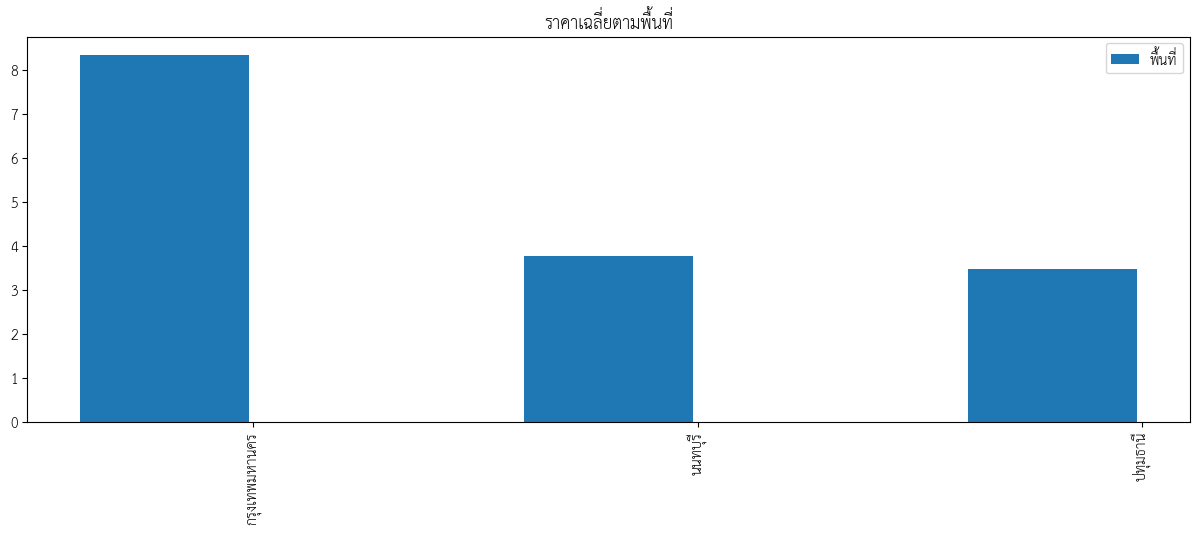

In [5]:

t2 = (df_inner.groupby(['province_name_th'])['price_min_y'].mean())
t2_name = list(t2.keys())
t2_value  = t2.values/1000000
X_axis = np.arange(len(t2_name))
plt.figure(figsize=(15,5),dpi=100) 
#ploat
plt.title('ราคาเฉลี่ยตามพื้นที่')
plt.bar(X_axis - 0.2, t2_value, 0.38, label = 'พื้นที่')

plt.xticks(rotation = 'vertical')
plt.xticks(X_axis, t2_name)

plt.legend()
plt.show() 

In [11]:
train_station = pd.read_csv('opendata_train_station.csv')

fig = px.scatter_mapbox(train_station, lat="latitude", lon="longitude",color="station_th", hover_name="station_th", hover_data=["line_type", "line_th"],
                        color_discrete_sequence=["blue"], zoom=12, height=500)

fig2 = px.scatter_mapbox(n_df_project, lat="latitude", lon="longitude", hover_name="name_th", hover_data=["propertytype_name_en", "price_min"],
                        color_discrete_sequence=["magenta"], zoom=12, height=500)
fig.add_trace(fig2.data[0]) # adds the line trace to the first figure

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()